In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
data=pd.read_csv(r"D:\learning\machine learning\sem-5-ML-PBL\heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


C:\Users\ragul\AppData\Local\Temp\ipykernel_4212\3557477148.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=fig.gca())


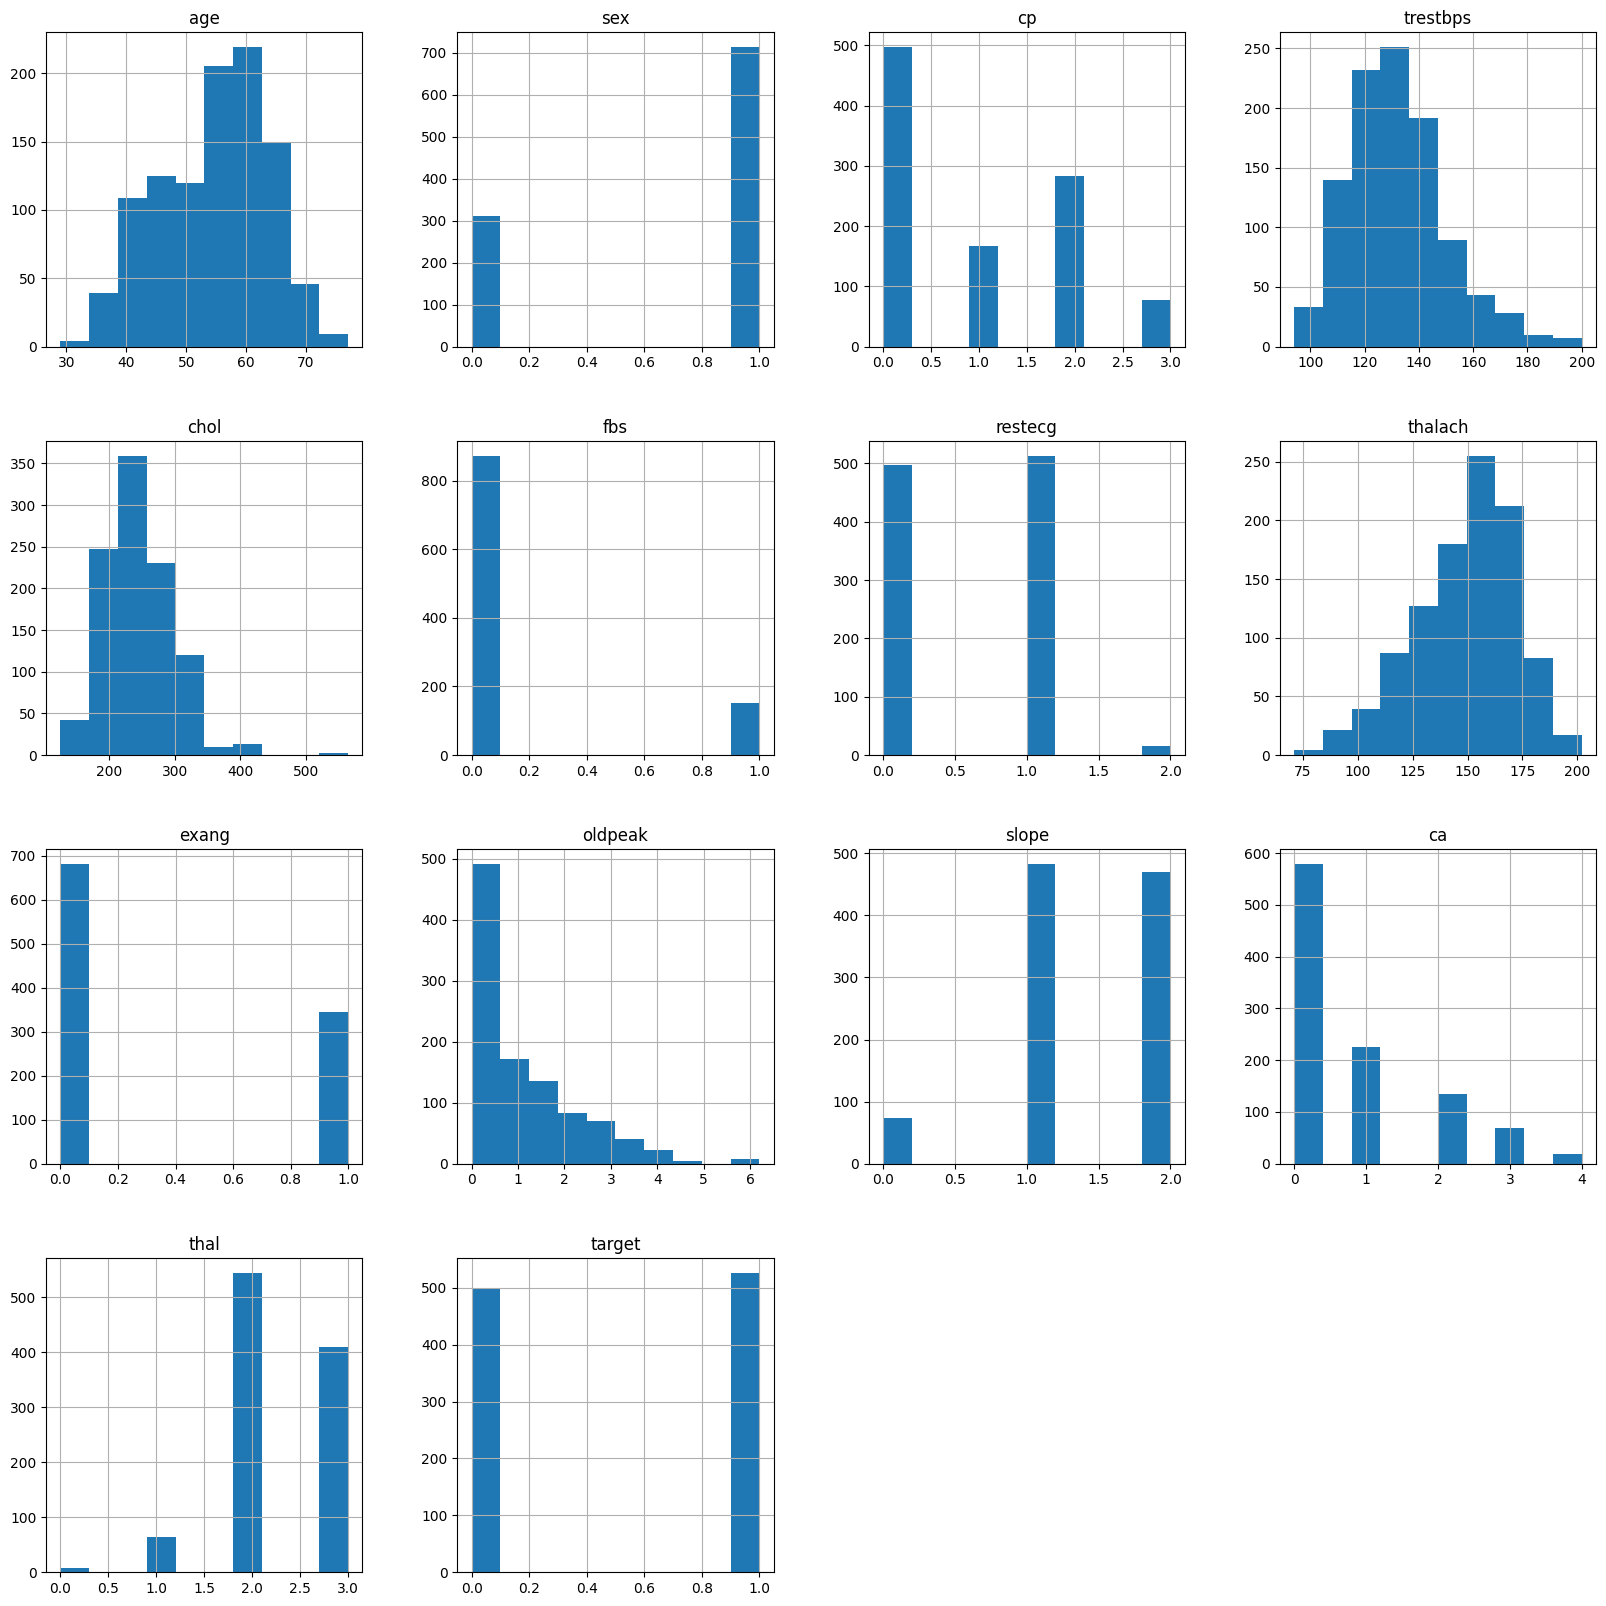

In [5]:
fig=plt.figure(figsize=(20,20))
data.hist(ax=fig.gca())
plt.show()

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

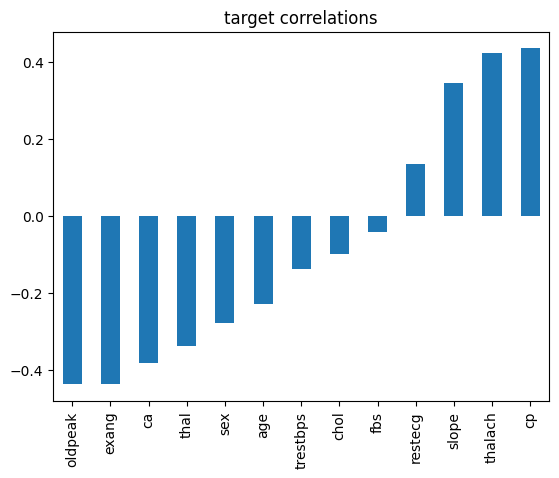

In [7]:
data.corr()['target'][:-1].sort_values().plot(kind='bar')
plt.title('target correlations')
plt.show()

In [1]:
import numpy as np

In [3]:
s=np.array([[1,2,3],[2,3,4]])
np.sum(s,axis=1)

array([6, 9])

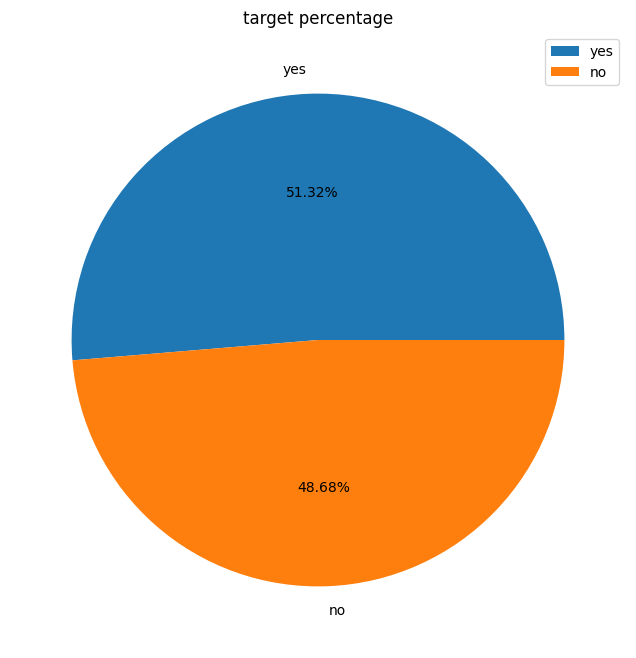

In [8]:
plt.figure(figsize=(10,8))
plt.pie(data['target'].value_counts(),labels=['yes','no'],autopct='%.2f%%')
plt.title('target percentage')
plt.legend()
plt.show()

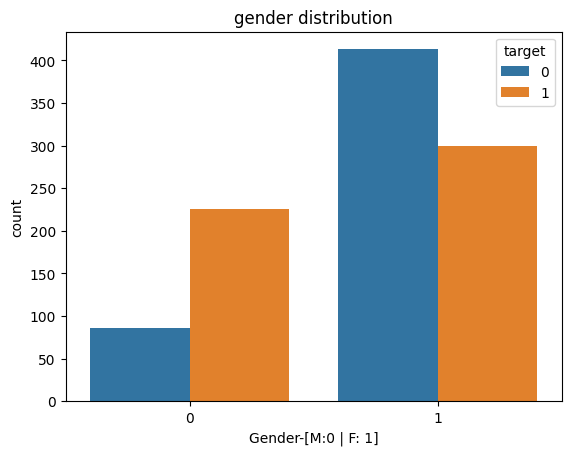

In [9]:
sns.countplot(x='sex',data=data,hue='target')
plt.title('gender distribution')
plt.xlabel('Gender-[M:0 | F: 1]')
plt.show()

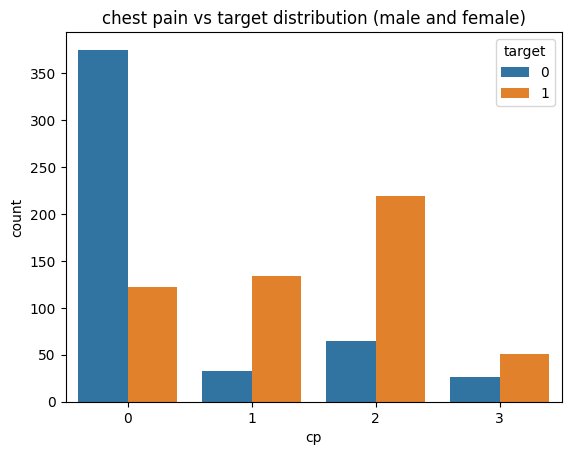

In [10]:
sns.countplot(data=data,x='cp',hue='target')
plt.title('chest pain vs target distribution (male and female)')
plt.show()

<Axes: >

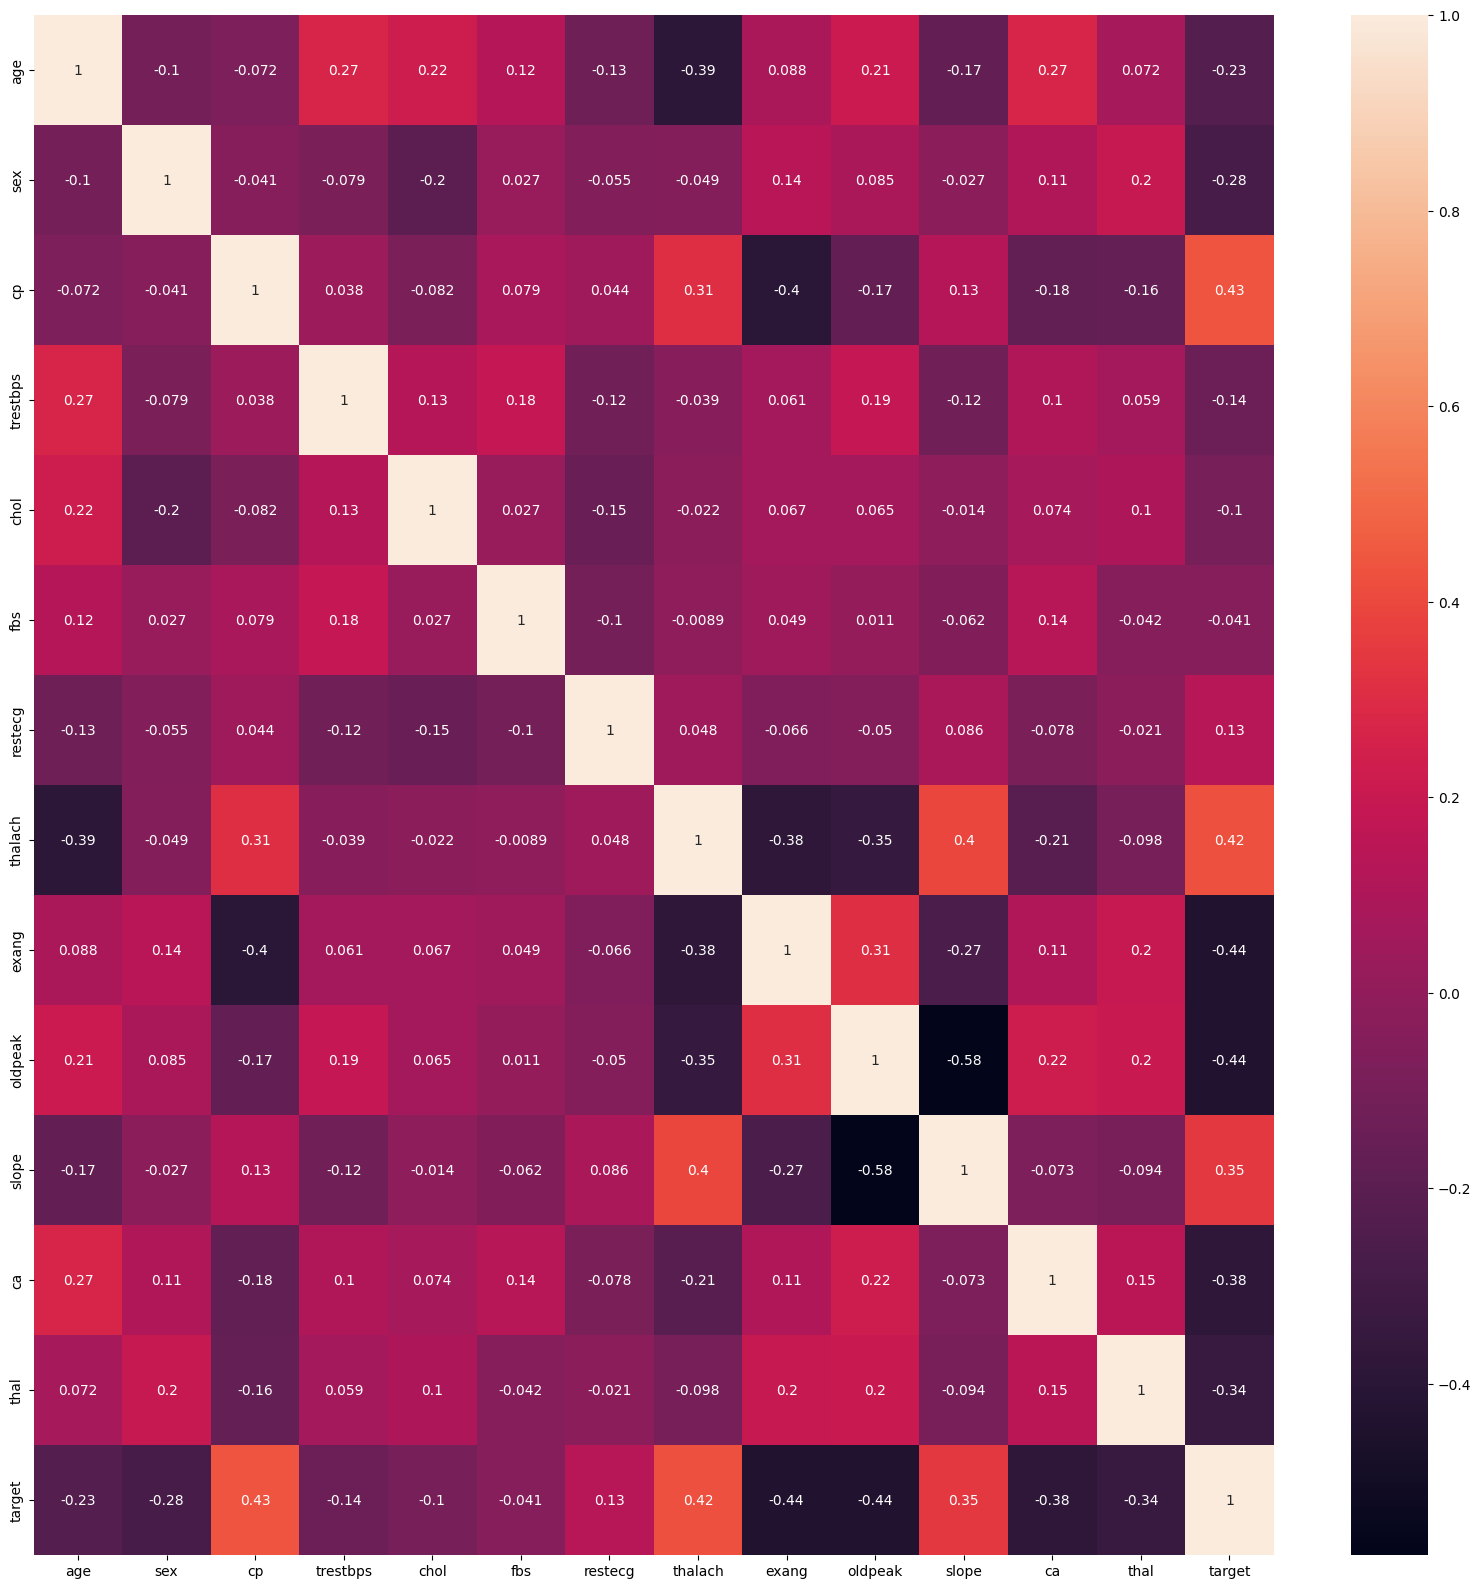

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data[data.columns].corr(), annot=True)

In [12]:
data[data['target']==1].value_counts('sex')

sex
1    300
0    226
Name: count, dtype: int64

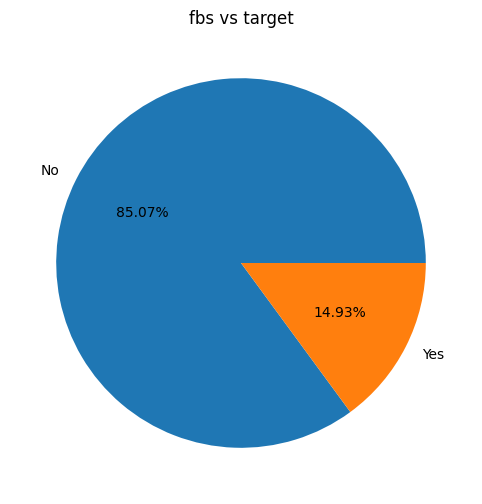

In [13]:
plt.figure(figsize=(10,6))
plt.pie(data['fbs'].value_counts(),labels=['No','Yes'],autopct='%.2f%%')
plt.title('fbs vs target')
plt.show()

#### *Data split*

In [103]:
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],random_state=1,test_size=0.25)

In [104]:
x_train.shape


(768, 13)

## Random Forest Classifier

In [120]:
forest=RandomForestClassifier(n_estimators=20,max_depth=10,min_samples_leaf=10)
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=20)

In [121]:
print(f'Training Score={forest.score(x_train,y_train)}\nTest Score={forest.score(x_test,y_test)}')

Training Score=0.91015625
Test Score=0.8949416342412452


In [122]:
print(f'recall={recall_score(y_test,y_pr_test)}\nprecision= {precision_score(y_test,y_pr_test)}\nF1 score= {f1_score(y_test,y_pr_test)}')

recall=0.937007874015748
precision= 0.8561151079136691
F1 score= 0.8947368421052632


In [123]:
y_pr_test,y_pr_train=forest.predict(x_test),forest.predict(x_train)


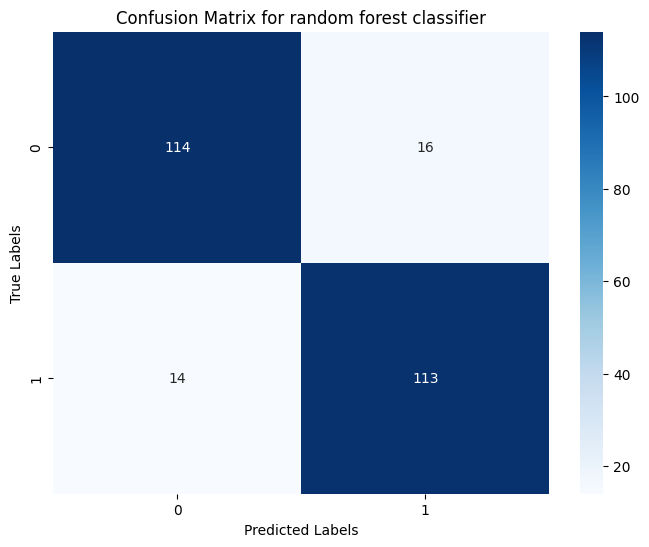

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pr_tst)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for random forest classifier')
plt.show()


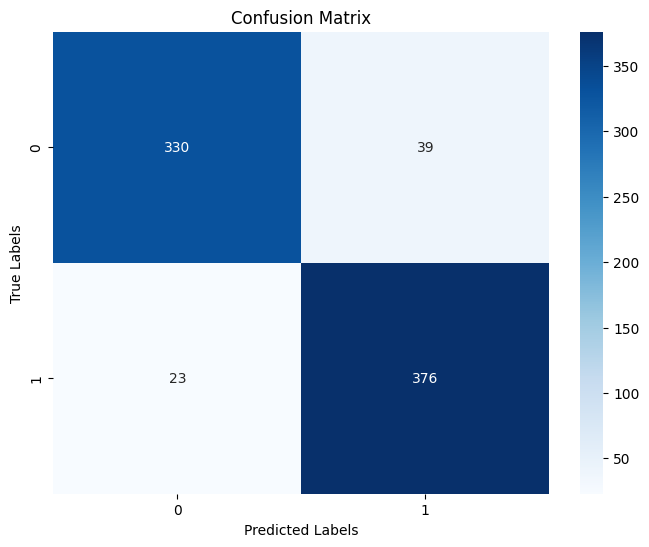

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,y_pr_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for random forest')
plt.show()


## Decision Tree Classifier

In [71]:
tree=DecisionTreeClassifier(max_depth=10,min_samples_leaf=10)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [72]:
print(f'Training Score={tree.score(x_train,y_train)}\nTest Score={tree.score(x_test,y_test)}')

Training Score=0.9166666666666666
Test Score=0.8832684824902723


In [73]:
y_pr_tst,y_pr_train=tree.predict(x_test),tree.predict(x_train)

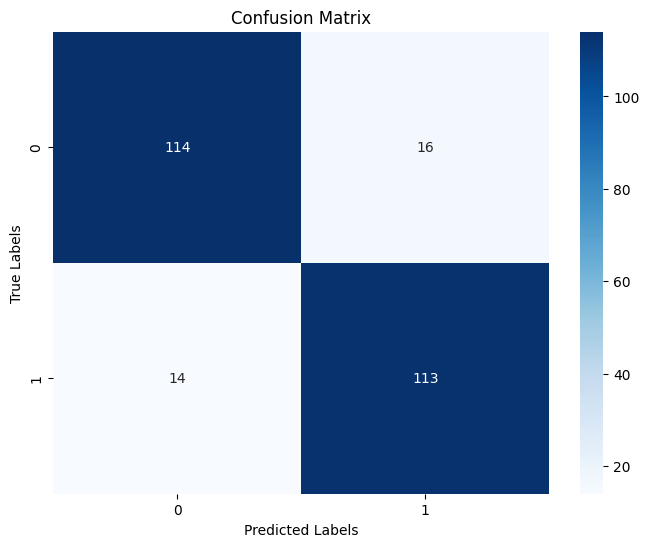

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pr_tst)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


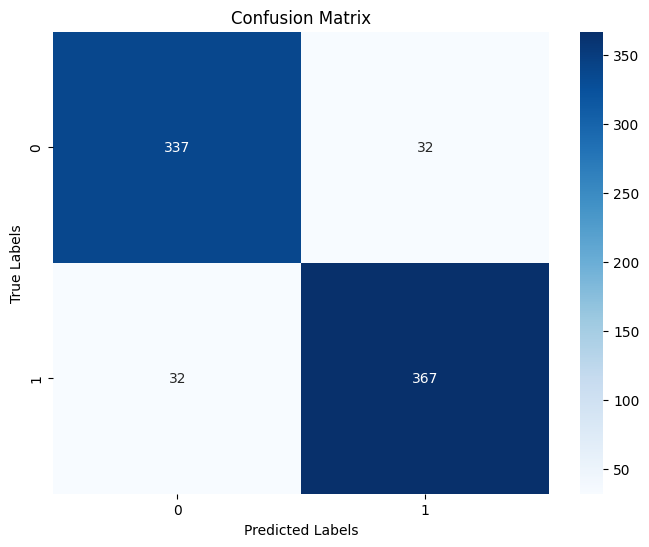

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,y_pr_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Logistic Regression

In [111]:
x_train_scaled=pd.DataFrame(x_train,columns=data.columns[:-1])
x_test_scaled=pd.DataFrame(x_test)
cols=[0,3,4,7,9]

In [112]:
scaler=StandardScaler()
x_train_scaled.iloc[:,cols]=scaler.fit_transform(x_train_scaled.iloc[:,cols])
x_test_scaled.iloc[:,cols]=scaler.transform(x_test.iloc[:,cols])
x_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,768.0,-2.636780e-16,1.000652,-2.856746,-0.729602,0.166037,0.725812,2.517091
sex,768.0,6.901042e-01,0.462752,0.000000,0.000000,1.000000,1.000000,1.000000
cp,768.0,9.049479e-01,0.999388,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,768.0,-5.481726e-16,1.000652,-2.152140,-0.674662,-0.106401,0.461860,3.871425
chol,768.0,-4.625929e-18,1.000652,-2.299255,-0.697701,-0.116184,0.560663,6.051707
fbs,768.0,1.393229e-01,0.346509,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,768.0,5.299479e-01,0.527362,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,768.0,4.209596e-16,1.000652,-3.389157,-0.730496,0.141196,0.707796,2.320426
exang,768.0,3.372396e-01,0.473076,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,768.0,1.202742e-16,1.000652,-0.903775,-0.903775,-0.222283,0.629581,4.377784


In [113]:
classifier=LogisticRegressionCV(penalty='l2')
classifier.fit(x_train_scaled,y_train)

LogisticRegressionCV()

In [114]:
print(f'train accuracy= {classifier.score(x_train_scaled,y_train)}\ntest accuracy= {classifier.score(x_test_scaled,y_test)}')

train accuracy= 0.8580729166666666
test accuracy= 0.8093385214007782


In [117]:
print(f'recall={recall_score(y_test,y_pred_test)}\nprecision= {precision_score(y_test,y_pred_test)}\nF1 score= {f1_score(y_test,y_pred_test)}')

recall=0.9212598425196851
precision= 0.75
F1 score= 0.8268551236749115


In [116]:
y_pred_train=classifier.predict(x_train_scaled)
y_pred_test=classifier.predict(x_test_scaled)

In [118]:
classifier.score(x_train_scaled,y_train)

0.8580729166666666

In [92]:
classifier.score(x_test_scaled,y_test)

0.6770428015564203

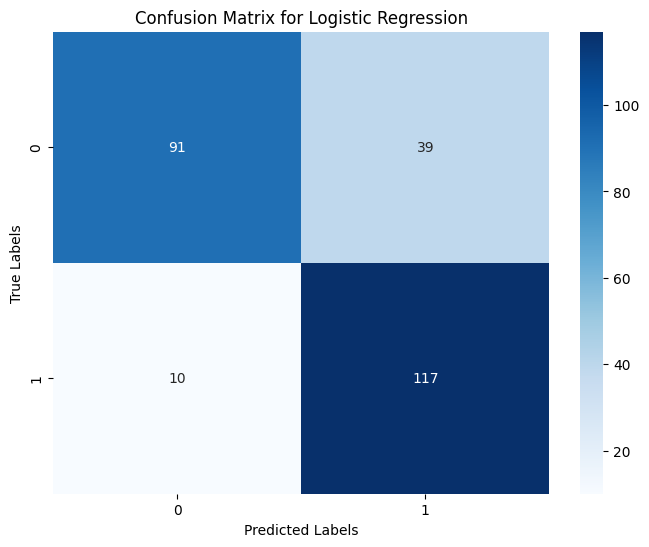

In [119]:
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


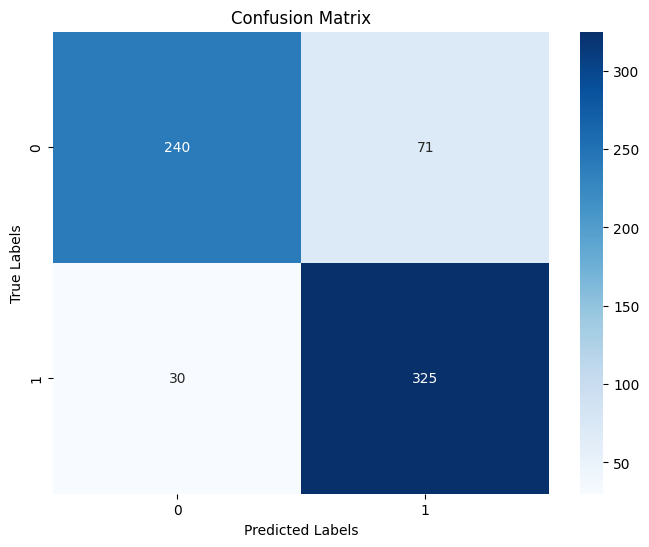

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### *SVM*

In [43]:
svm=SVC(random_state=101,gamma='auto')

In [44]:
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=101)

In [45]:
svm.score(x_test,y_test)

0.9805013927576601

In [46]:
svm.score(x_train,y_train)

1.0

In [84]:
data.shape

(1025, 14)

In [1]:
import numpy as np

In [2]:
a=np.random.randn(4,3)
b=np.random.randn(1,3)
a*b

array([[-0.24875346,  0.79720208, -0.59298257],
       [-0.20931831,  0.61547051, -0.80160532],
       [-0.47680677,  1.58409474, -0.4500685 ],
       [-0.08727742,  0.92655644, -0.30224087]])

In [3]:
a=np.array([[2,1],[1,3]])
np.dot(a,a)

array([[ 5,  5],
       [ 5, 10]])

In [4]:
l=[1,2,3,3]
l.index(3)

2

In [6]:
if (0 in l):
    print(l)

In [7]:
l=list(set(l))

In [8]:
l

[1, 2, 3]